# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

# Loading the dataset

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing data for splitting

In [4]:
shuffled_data = data.sample(frac=1, random_state=42)  
shuffled_data.reset_index(drop=True, inplace=True) 

In [5]:
shuffled_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor


# Data inspection

C:\Users\hazem\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hazem\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


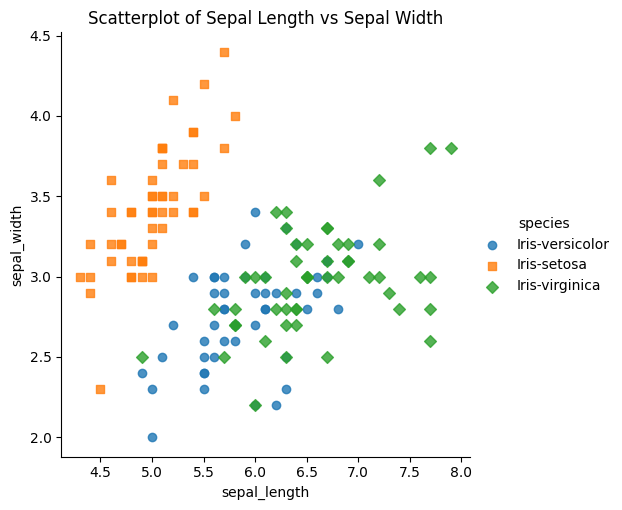

In [6]:
sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=shuffled_data, fit_reg=False, markers=["o", "s", "D"])
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.show()

C:\Users\hazem\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hazem\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


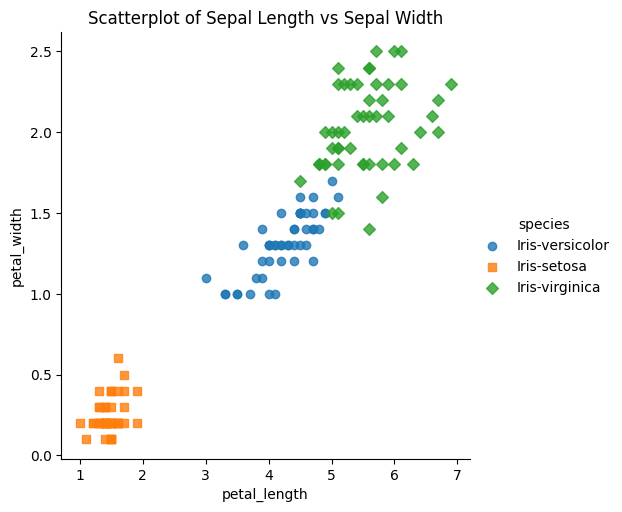

In [7]:
sns.lmplot(x='petal_length', y='petal_width', hue='species', data=shuffled_data, fit_reg=False, markers=["o", "s", "D"])
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.show()

# Splitting Data

In [8]:
X = shuffled_data.drop('species',axis=1)
y = shuffled_data['species']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the 3 distance measures

1- Euclidean Distance:

In [10]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

2- Manhattan Distance:


In [11]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

3- Cosine Similarity:

In [12]:
def cosine_similarity(x1, x2):
    dot_product = np.dot(x1, x2)
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)
    
    similarity = dot_product / (norm_x1 * norm_x2 + 1e-10)

    
    # here we return (1- similarity) because we need the more similar ones
    return 1-similarity

# Applying KNN

1- Using Euclidean Distance (K=3):

In [13]:
from collections import Counter


def knnEuclidean(X_train, y_train, X_test, k=3):
    
    predictions = []
    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    y_train = np.array(y_train.values, dtype=str)

    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return np.array(predictions)

predictions = knnEuclidean(X_train,y_train,X_test,3)

accuracy = accuracy_score(predictions,y_test)

print(accuracy*100)

100.0


[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


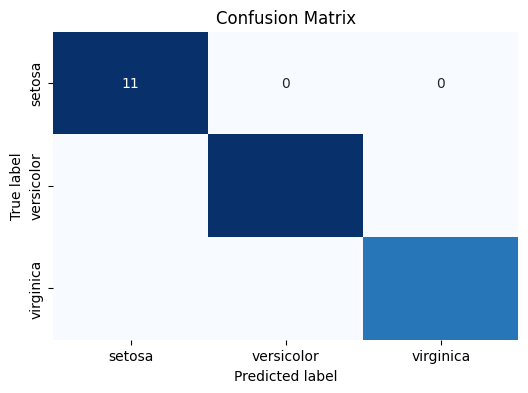

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(cm)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

Using Euclidean Distance (K=5):

In [15]:
predictions = knnEuclidean(X_train,y_train,X_test,5)
accuracy = accuracy_score(predictions,y_test)
print(accuracy*100)

100.0


[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


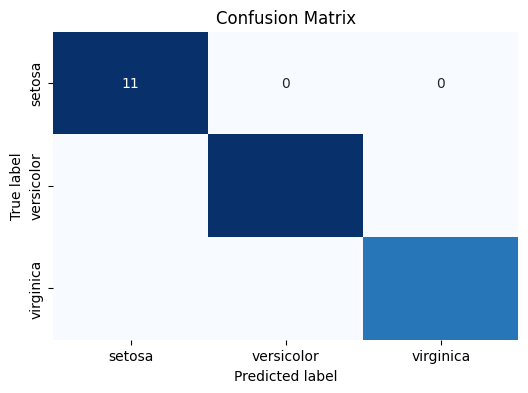

In [16]:
cm = confusion_matrix(y_test, predictions)

print(cm)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

2- Using Manhatten Distance (K=3):

In [17]:
def knnManhatten(X_train, y_train, X_test, k=3):
    
    predictions = []
    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    y_train = np.array(y_train.values, dtype=str)

    for x_test in X_test:
        distances = [manhattan_distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return np.array(predictions)

predictions = knnManhatten(X_train,y_train,X_test,3)

accuracy = accuracy_score(predictions,y_test)

print(accuracy*100)

100.0


[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


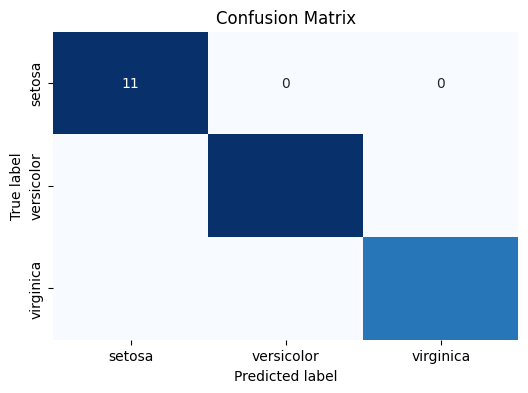

In [18]:
cm = confusion_matrix(y_test, predictions)

print(cm)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

2- Using Manhatten Distance (K=5):

In [19]:
predictions = knnManhatten(X_train,y_train,X_test,5)

accuracy = accuracy_score(predictions,y_test)

print(accuracy*100)

100.0


[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


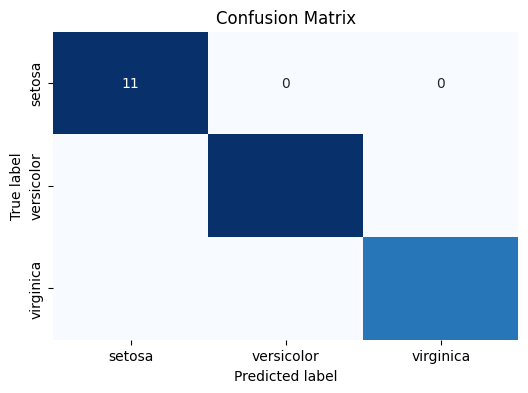

In [20]:
cm = confusion_matrix(y_test, predictions)

print(cm)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

3- Using Cosine Similarity (K=3):

In [21]:
def knnCos(X_train, y_train, X_test, k=3):
    
    predictions = []
    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    y_train = np.array(y_train.values, dtype=str)

    for x_test in X_test:
        distances = [cosine_similarity(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return np.array(predictions)

predictions = knnCos(X_train,y_train,X_test,3)

accuracy = accuracy_score(predictions,y_test)

print(accuracy*100)

100.0


[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


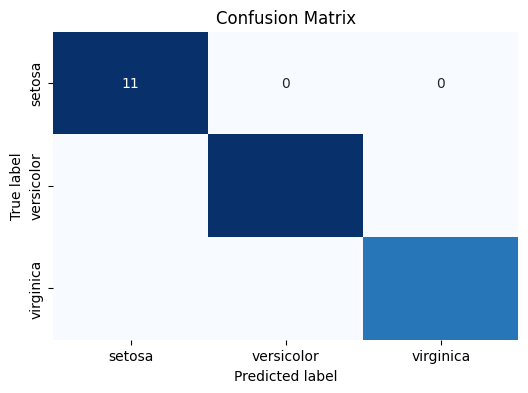

In [22]:
cm = confusion_matrix(y_test, predictions)

print(cm)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

Using Cosine Similarity (K=5)

In [23]:
predictions = knnCos(X_train,y_train,X_test,5)

accuracy = accuracy_score(predictions,y_test)

print(accuracy*100)

100.0


[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


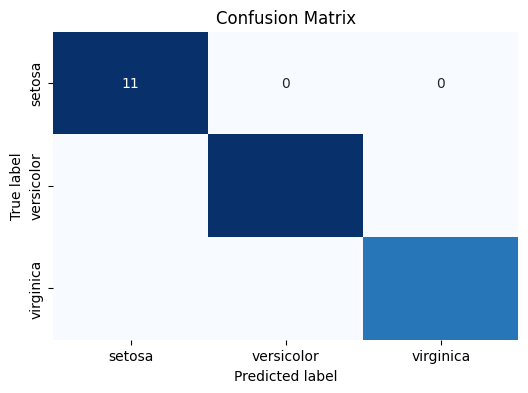

In [24]:
cm = confusion_matrix(y_test, predictions)

print(cm)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()